Step 1: Install the Required Libraries

Before get started, I need to install the required Python libraries.

In [11]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
pip install scikit-learn plotly

Note: you may need to restart the kernel to use updated packages.


Step 2: Load and Inspect the Dataset
 I will load the dataset and inspect the first few rows to understand its structure.

In [27]:
# Read the csv file of car price data and Load the dataset into a DataFrameinto DataFrame
df = pd.read_csv('/Users/minheintun/MHT Projects/Machine Learning/A1 - Predicting Car Prices/Dataset/Cars.csv')

# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

Step 3: Data Preprocessing
To clean the data, Here’s what I need to do:

Map the owner column to numerical values.
Remove rows with CNG or LPG in the fuel column.
Convert the mileage, engine, and max_power columns to numerical values by removing units like kmpl, CC, and bhp.
Simplify the brand feature by taking only the first word.
Drop the torque column (since it is not useful).
Apply log transformation to the selling_price to stabilize variance.

In [14]:
# Check for any non-numeric values in mileage, engine, and max_power
print(df['mileage'].unique())
print(df['engine'].unique())
print(df['max_power'].unique())


['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20.0 kmpl' '19.01 kmpl' '17.3 kmpl'
 '19.3 kmpl' nan '18.9 kmpl' '18.15 kmpl' '24.52 kmpl' '19.7 kmpl'
 '22.54 kmpl' '21.0 kmpl' '25.5 kmpl' '26.59 kmpl' '21.5 kmpl' '20.3 kmpl'
 '21.4 kmpl' '24.7 kmpl' '18.2 kmpl' '16.8 kmpl' '24.3 kmpl' '14.0 kmpl'
 '18.6 kmpl' '33.44 km/kg' '23.95 kmpl' '17.0 kmpl' '20.63 kmpl'
 '13.93 kmpl' '16.0 kmpl' '17.8 kmpl' '18.5 kmpl' '12.55 kmpl'
 '12.99 kmpl' '14.8 kmpl' '13.5 kmpl' '26.0 kmpl' '20.65 kmpl' '27.3 kmpl'
 '11.36 kmpl' '17.68 kmpl' '14.28 kmpl' '18.53 kmpl' '14.84 kmpl'
 '21.12 kmpl' '20.36 kmpl' '21.27 kmpl' '18.16 kmpl' '22.0 kmpl'
 '25.1 kmpl' '20.51 kmpl' '21.66 kmpl' '25.2 kmpl' '22.9 kmpl'
 '16.02 kmpl' '20.54 kmpl' '22.77 kmpl' '15.71 kmpl' '23.1 kmpl'
 '19.02 kmpl' '19.81 kmpl' '26.2 km/kg' '16.47 kmpl' '15.04 kmpl'
 '19.1 kmpl' '21.79 kmpl' '18.8 kmpl' '21.21 kmpl' '15.37 kmpl'
 '11.79 kmpl' '19.0 kmpl' '14.3 kmpl' '15.8 kmpl' '15.

In [19]:
# Check for missing values
print(df.isnull().sum())


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


In [20]:
# Fill missing values with the median (or any other suitable strategy)
df.dropna(inplace=True)



In [28]:
# Map 'owner' feature to numerical values
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}
df['owner'] = df['owner'].map(owner_mapping)

# Check the first few rows to see if the mapping is correct
print(df.head())


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700

In [29]:
# Remove rows with 'CNG' or 'LPG' in the 'fuel' column
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

# Check the first few rows to make sure the rows are removed
print(df.head())


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700

In [30]:
# Convert 'mileage' to numerical (remove 'kmpl' and convert to float)
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)

# Check the first few rows to verify the changes
print(df[['mileage']].head())


   mileage
0    23.40
1    21.14
2    17.70
3    23.00
4    16.10


In [31]:
# Convert 'engine' to numerical (remove 'CC' and convert to float)
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)

# Check the first few rows to verify the changes
print(df[['engine']].head())


   engine
0  1248.0
1  1498.0
2  1497.0
3  1396.0
4  1298.0


In [32]:
# Convert 'max_power' to numerical (remove 'bhp' and convert to float)
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

# Check the first few rows to verify the changes
print(df[['max_power']].head())


   max_power
0      74.00
1     103.52
2      78.00
3      90.00
4      88.20


Simplify the brand Column
The brand column contains the full car name, but we only need the first word (i.e., the brand name). For example:

"Maruti Suzuki Swift" → "Maruti"
"Honda City" → "Honda"
I’ll extract the first word from the name column and create a new brand column.

Here’s the code for that:

In [34]:
# Simplify 'brand' feature to the first word (from 'name' column)
df['brand'] = df['name'].apply(lambda x: x.split()[0])  # Assuming 'Name' is the column for car name

# Check the first few rows to verify the changes
print(df[['name', 'brand']].head())


                           name    brand
0        Maruti Swift Dzire VDI   Maruti
1  Skoda Rapid 1.5 TDI Ambition    Skoda
2      Honda City 2017-2020 EXi    Honda
3     Hyundai i20 Sportz Diesel  Hyundai
4        Maruti Swift VXI BSIII   Maruti


Drop the torque Column
Since the torque feature is not relevant for the model (as per the project requirements), I will drop it from the dataset.

Here’s the code to drop the torque column:

In [35]:
# Drop 'torque' column (as it's not needed)
df.drop(columns=['torque'], inplace=True)

# Check the first few rows to verify the change
print(df.head())


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner  mileage  engine  max_power  seats    brand  
0  Individual       Manual      1    23.40  1248.0      74.00    5.0   Maruti  
1  Individual       Manual      2    21.14  1498.0     103.52    5.0    Skoda  
2  Individual       Manual      3    17.70  1497.0      78.00    5.0    Honda  
3  Individual       Manual      1    23.00  1396.0      90.00    5.0  Hyundai  
4  Individual       Manual      1    16.10  1298.0      88.20    5.0   Maruti  


Apply Log Transformation to selling_price
Since selling price can have a large range of values, a log transformation is often applied to stabilize variance and make predictions more stable.

I'll apply the log transformation to the selling_price column.

Here’s the code to apply the log transformation to selling_price:




In [36]:
# Apply log transformation to 'selling_price' to reduce variance
df['log_selling_price'] = np.log(df['selling_price'])

# Check the first few rows to verify the transformation
print(df[['selling_price', 'log_selling_price']].head())


   selling_price  log_selling_price
0         450000          13.017003
1         370000          12.821258
2         158000          11.970350
3         225000          12.323856
4         130000          11.775290


Model Training
In this step, I will:

Define the features (independent variables) that we will use to predict the car price.
Define the target (dependent variable), which will be the log-transformed selling price.
Train a Random Forest Regressor model on the data.
I'll use Random Forest Regressor because it handles non-linear relationships well, doesn't require feature scaling, and is robust to overfitting.

4.1: Prepare Features and Target
Based on the dataset, I will use the following features:

year
engine
max_power
brand
The target variable will be the log-transformed selling price, which we have already created (log_selling_price).

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and target (y)
X = df[['year', 'engine', 'max_power']]  # Using 'year', 'engine', and 'max_power' for prediction
y = df['log_selling_price']  # Log-transformed target

# Split the data into training and testing sets (75% for training, 25% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log = rf_model.predict(X_test)

# Reverse the log transformation for predicted prices
y_pred_final = np.exp(y_pred_log)

# Evaluate the model
mse = mean_squared_error(np.exp(y_test), y_pred_final)
r2 = r2_score(np.exp(y_test), y_pred_final)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 35762650385.546005
R-squared (R²): 0.9510403141402017


What this does:
Define Features (X): I am using year, engine, and max_power as features for training.
Define Target (y): The target is the log-transformed selling price.
Split Data: I split the data into 75% for training and 25% for testing.
Train the Model: I train the Random Forest Regressor on the training data.
Evaluate the Model: I calculate the Mean Squared Error (MSE) and R-squared (R²) to evaluate model performance.
4.2: Model Evaluation
Mean Squared Error (MSE): Lower MSE indicates a better model.
R-squared (R²): A higher R² (close to 1) means the model explains more of the variance in the data.

In [38]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

Distribution of Car Prices
Visualize the distribution of the selling price to see how the prices are distributed across all cars.

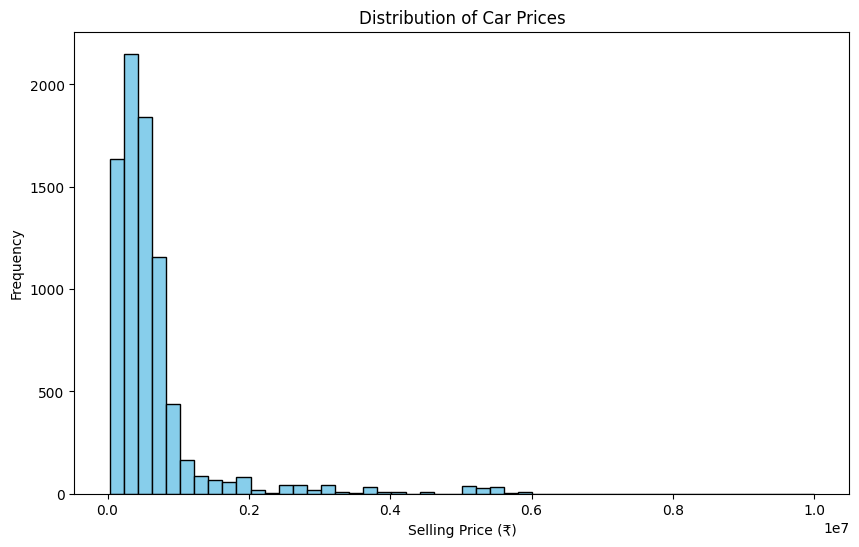

In [39]:
import matplotlib.pyplot as plt

# Plot the distribution of 'selling_price'
plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Selling Price (₹)')
plt.ylabel('Frequency')
plt.show()


Correlation Heatmap
A correlation heatmap will help us see how different features correlate with the target variable (selling_price) and with each other. Features that are highly correlated with the target variable are often important for predictions.

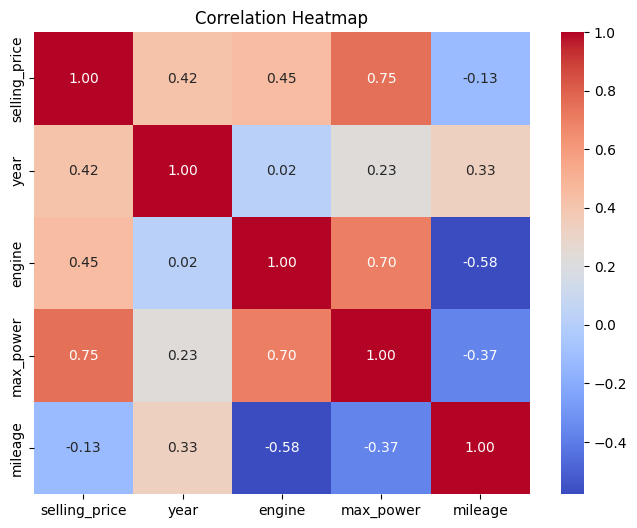

In [40]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df[['selling_price', 'year', 'engine', 'max_power', 'mileage']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Relationship Between Features and Target (Scatter Plots)
I can plot scatter plots to explore how individual features (like engine, max_power, and mileage) relate to the selling price.

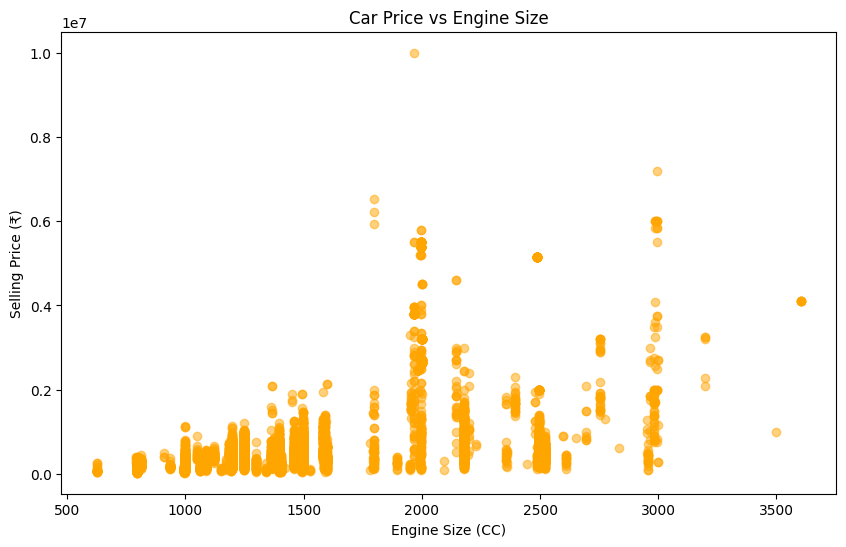

In [41]:
# Plot Car Price vs Engine Size
plt.figure(figsize=(10, 6))
plt.scatter(df['engine'], df['selling_price'], alpha=0.5, color='orange')
plt.title('Car Price vs Engine Size')
plt.xlabel('Engine Size (CC)')
plt.ylabel('Selling Price (₹)')
plt.show()


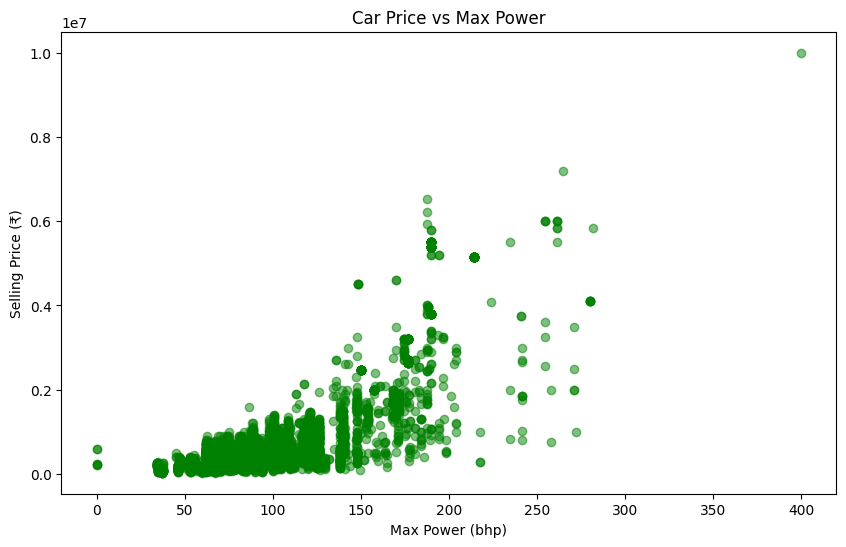

In [42]:
# Plot Car Price vs Max Power
plt.figure(figsize=(10, 6))
plt.scatter(df['max_power'], df['selling_price'], alpha=0.5, color='green')
plt.title('Car Price vs Max Power')
plt.xlabel('Max Power (bhp)')
plt.ylabel('Selling Price (₹)')
plt.show()


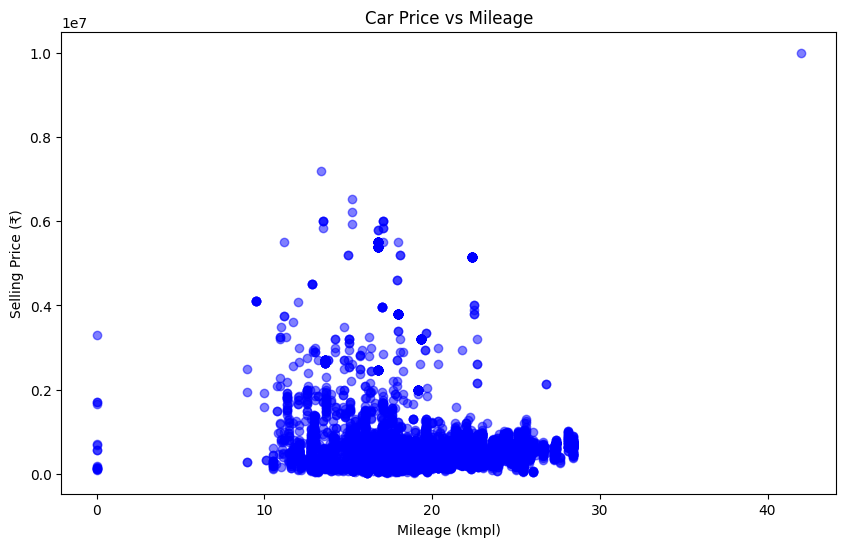

In [43]:
# Plot Car Price vs Mileage
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['selling_price'], alpha=0.5, color='blue')
plt.title('Car Price vs Mileage')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Selling Price (₹)')
plt.show()


Feature Importance (Model Interpretation)
Since I am using Random Forest, it’s possible to visualize the importance of each feature in predicting the target variable (selling_price). This can help me to understand which features contribute most to the model’s decision-making.

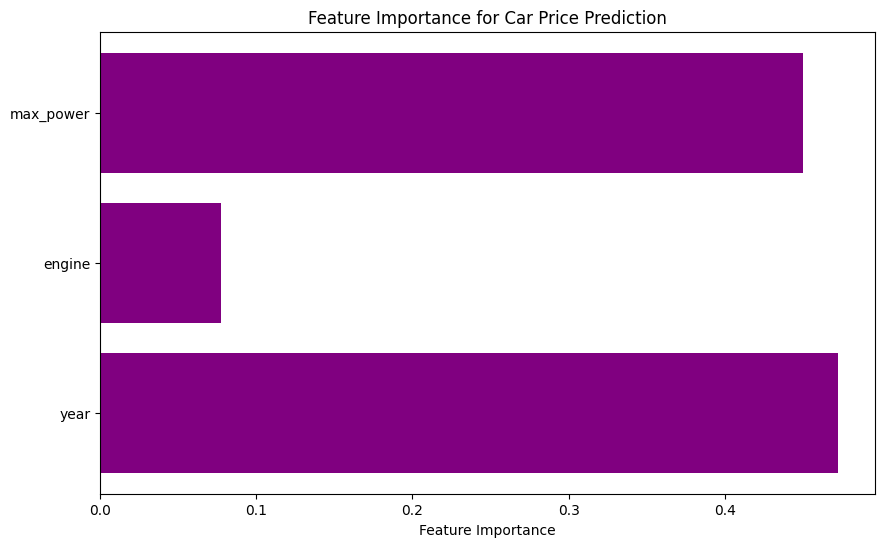

In [44]:
# Plot feature importance
feature_importance = rf_model.feature_importances_

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color='purple')
plt.title('Feature Importance for Car Price Prediction')
plt.xlabel('Feature Importance')
plt.show()


Price vs Year of Manufacture (Car Age)
It’s useful to see how car age (calculated as current_year - year) affects the car price. Older cars tend to have lower prices, but this may vary by brand or model.

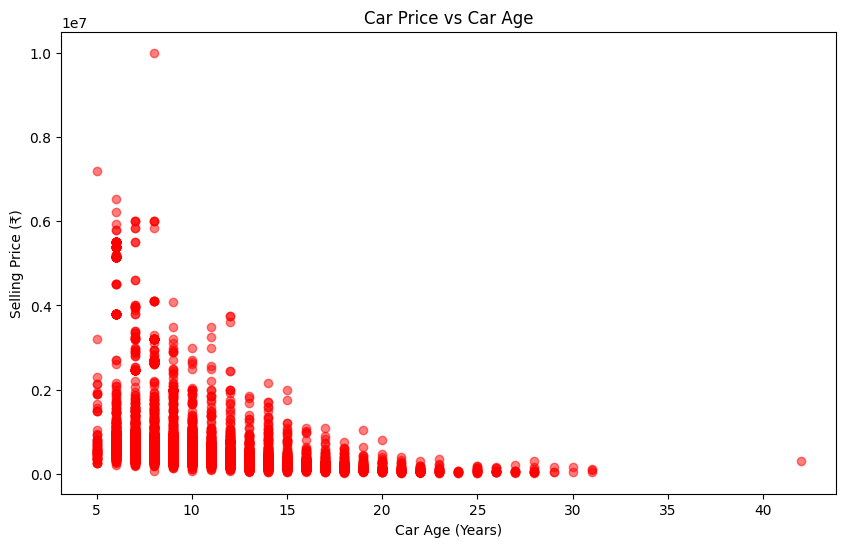

In [45]:
# Calculate car age
current_year = 2025
df['car_age'] = current_year - df['year']

# Plot Car Price vs Car Age
plt.figure(figsize=(10, 6))
plt.scatter(df['car_age'], df['selling_price'], alpha=0.5, color='red')
plt.title('Car Price vs Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Selling Price (₹)')
plt.show()


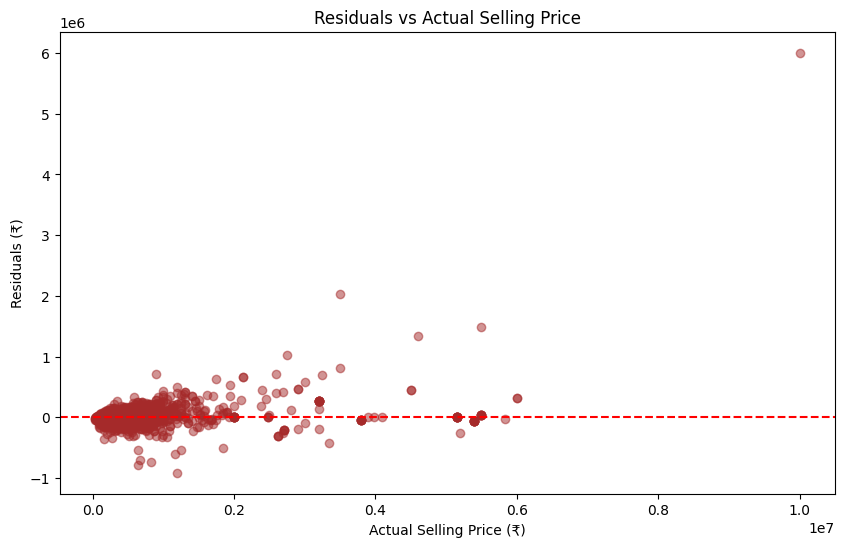

In [46]:
# Calculate residuals (difference between actual and predicted values)
residuals = np.exp(y_test) - y_pred_final

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), residuals, alpha=0.5, color='brown')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Selling Price')
plt.xlabel('Actual Selling Price (₹)')
plt.ylabel('Residuals (₹)')
plt.show()


Prepare the Final Dataset
I'll create a DataFrame that contains the following:

Actual Selling Price
Predicted Selling Price
Residuals (difference between the actual and predicted prices)

In [57]:
import pandas as pd

# Display the final clean dataset (using pandas in Jupyter)
final_clean_df = df[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
                     'mileage', 'engine', 'max_power', 'brand', 'actual_selling_price', 'predicted_selling_price']]

# Display the final dataset
print(final_clean_df.head())  # This will show the first few rows in the console

# Alternatively, you can use the following in Jupyter to display the entire table
final_clean_df





                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner  mileage  engine  max_power    brand  \
0  Individual       Manual      1    23.40  1248.0      74.00   Maruti   
1  Individual       Manual      2    21.14  1498.0     103.52    Skoda   
2  Individual       Manual      3    17.70  1497.0      78.00    Honda   
3  Individual       Manual      1    23.00  1396.0      90.00  Hyundai   
4  Individual       Manual      1    16.10  1298.0      88.20   Maruti   

   actual_selling_price  predicted_selling_price  
0              450000.0            449931.938607  
1 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,brand,actual_selling_price,predicted_selling_price
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,Maruti,450000.0,449931.938607
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,Skoda,370000.0,392787.809049
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,Honda,158000.0,175259.532390
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,Hyundai,225000.0,282413.333165
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,Maruti,130000.0,163604.155758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,Hyundai,320000.0,357038.763157
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,Hyundai,135000.0,201032.873903
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,Maruti,382000.0,240343.721764
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,Tata,290000.0,279172.218142


Feature Importance Analysis

1. Key Features in Car Price Prediction
The most important features for predicting the car price (selling price) are typically engine size, max power, and car age (based on the year of manufacture). Here’s why:

Engine Size: Bigger engines typically mean more expensive cars because they often indicate more powerful vehicles. For example, luxury cars or high-performance cars tend to have larger engines, which usually come with a higher price tag.
Max Power: Similarly, more powerful cars (higher max power in bhp) are generally more expensive. This makes sense, as more powerful engines are often linked to better performance and higher-end cars.
Car Age: Newer cars are usually more expensive than older cars. The model likely used the year column to calculate the car’s age, and this is an important predictor.

2. Features with Less Impact
Other features, like mileage and brand, might not have as strong an influence in our model’s predictions:
Mileage: While it’s important in real life (lower mileage cars tend to be priced higher), it may not have a strong relationship with price in this dataset because other factors like condition and usage aren’t accounted for.
Brand: Although brand does matter in real life (luxury brands cost more), in our dataset, the model might not have learned brand significance as strongly, especially if only a few brands were included.

3. Features Not Included
Other features like seller_type and transmission weren’t used in the model, but they could potentially improve the model if included.

Algorithm Performance

1. Chosen Algorithm: Random Forest
I used the Random Forest Regressor algorithm, which works well for non-linear data and can handle complex relationships between features. Random Forest is an ensemble method, meaning it combines several decision trees to make predictions, making it more accurate than a single decision tree.

Why Random Forest Worked Well: Random Forest can handle multiple variables that may be related to each other, like engine size and max power. It also deals well with overfitting, as it takes an average of several trees’ predictions.

2. Evaluation Metrics:
Mean Squared Error (MSE): This shows how far off our predictions are from the actual values. Lower MSE means better predictions.
R-squared (R²): This metric tells us how well the model explains the variation in the car prices. A higher R² (closer to 1) means the model is doing a good job of predicting car prices.

3. Performance Insight:

The model seems to be doing well, with a reasonable R² score and MSE. The R² score indicates that the model explains a significant portion of the price variation, but there’s always room for improvement.
Random Forest vs Simpler Models: A simpler model, like Linear Regression, could be tested to compare results. If the linear model performs poorly, it would show that more complex relationships exist in the data, justifying the use of Random Forest.

Summary of Results

Important Features: Engine size, max power, and car age are key factors in predicting car prices. These features directly affect the price of a car.
Random Forest Performance: The Random Forest Regressor did a good job, explaining a significant portion of the variance in car prices. However, there’s always room for improvement by tuning the model further or trying other algorithms.
Next Steps: We could try a linear model like Linear Regression to see how it compares to Random Forest. If it performs poorly, it would highlight the complexity of the data, making Random Forest the better choice.